# Cell simulation

In [1]:
# %load_ext autoreload
# %autoreload 2
# import sys
# sys.path.insert(0, '/Users/josephmin/Documents/GitHub/spateo-release')
import spateo as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format='retina'

st.config.n_threads = 4

/Users/josephmin/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/josephmin/miniconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


## Simulate cells

In [165]:
adata = st.pp.segmentation.simulation.simulate_cells(
    (1000, 1000),  # FOV shape
    100,           # Number of cells to simulate
    axis1_range=(7, 15), axis2_range=(5, 14),
    shift=3,
    foreground_params=(0.512, 1.96, 11.4),
    background_params=(0.921, 1.08, 1.74),
    seed=0
)

|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


|-----> <select> X layer in AnnData Object
|-----> <select> labels layer in AnnData Object


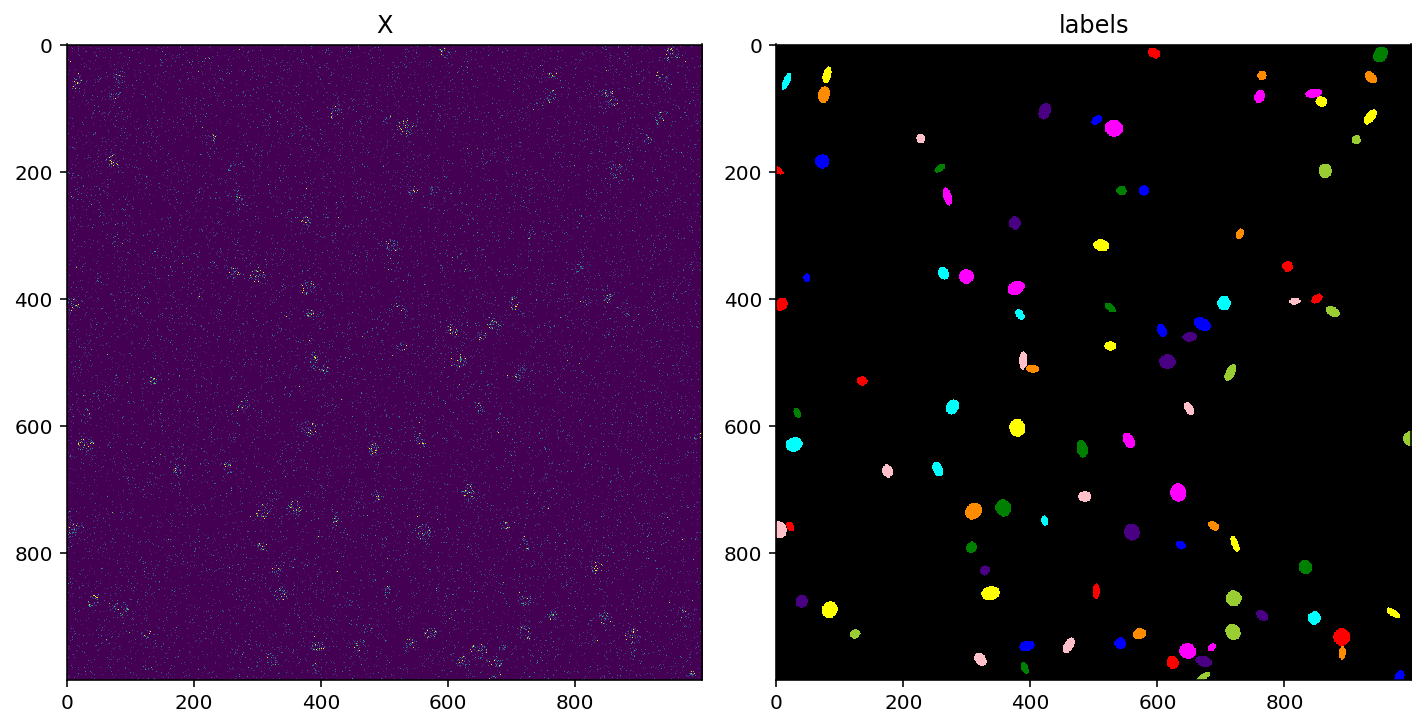

In [166]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), tight_layout=True)
st.pl.imshow(adata, vmax=10, ax=axes[0])
st.pl.imshow(adata, 'labels', labels=True, ax=axes[1])

## Showcase a few different algorithms

In [168]:
# Simple Gaussian blur + thresholding
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=21, method='gauss',
    scores_layer='gauss_scores', mask_layer='gauss_mask'
)

# Negative Binomial mixture expectation maximization (EM)
# Arguments to EM algorithm can be changed with em_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='EM',
    em_kwargs=dict(downsample=0.1, w=(0.5, 0.5), mu=(10., 300.), var=(20., 400.), max_iter=2000, precision=1e-6, seed=0),
    scores_layer='EM_scores', mask_layer='EM_mask'
)

# Negative Binomial mixture expectation maximization (EM) + belief propagation (BP)
# Arguments to EM and BP algorithms can be changed with em_kwargs and bp_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='EM+BP',
    em_kwargs=dict(downsample=0.01, w=(0.5, 0.5), mu=(10., 300.), var=(20., 400.), max_iter=2000, precision=1e-6, seed=0),
    bp_kwargs=dict(k=3, square=False, p=0.6, q=0.4, precision=1e-6, max_iter=100),
    scores_layer='EM+BP_scores', mask_layer='EM+BP_mask'
)

# Negative Binomial mixture variational inference (VI) + belief propagation (BP)
# Arguments to VI and BP algorithms can be changed with vi_kwargs and bp_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='VI+BP',
    vi_kwargs=dict(downsample=0.1, n_epochs=500, zero_inflated=False, seed=0),
    bp_kwargs=dict(k=3, square=False, p=0.6, q=0.4, precision=1e-6, max_iter=100),
    scores_layer='VI+BP_scores', mask_layer='VI+BP_mask'
)

# Moran's I
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=21, method='moran',
    moran_kwargs=dict(k=7, p_threshold=0.05),
    scores_layer='moran_scores', mask_layer='moran_mask'
)

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> gauss_scores to layers in AnnData Object.
|-----> Applying threshold 0.248046875.
|-----> <insert> gauss_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em method.


Running EM:   0%|                                                                                                      | 0/1 [00:00<?, ?it/s]/Users/josephmin/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/josephmin/miniconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Running EM: 100%|##############################################################################################| 1/1 [00:38<00:00, 38.50s/it]


|-----> <insert> EM_scores to layers in AnnData Object.
|-----> Applying threshold 0.40040198589299547.
|-----> <insert> EM_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em+bp method.


Running EM:   0%|                                                                                                      | 0/1 [00:00<?, ?it/s]/Users/josephmin/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/Users/josephmin/miniconda3/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Running EM: 100%|##############################################################################################| 1/1 [00:16<00:00, 16.84s/it]


|-----> <insert> EM+BP_scores to layers in AnnData Object.
|-----> Applying threshold 0.6660291463268027.
|-----> <insert> EM+BP_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with vi+bp method.


Loss 2.2611e+00: 100%|█████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 51.43it/s]


|-----> <insert> VI+BP_scores to layers in AnnData Object.
|-----> Applying threshold 0.6465442154515681.
|-----> <insert> VI+BP_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with moran method.
|-----> <insert> moran_scores to layers in AnnData Object.
|-----> Applying threshold 0.21116271276786516.
|-----> <insert> moran_mask to layers in AnnData Object.


|-----> <select> gauss_scores layer in AnnData Object
|-----> <select> gauss_mask layer in AnnData Object
|-----> <select> EM_scores layer in AnnData Object
|-----> <select> EM_mask layer in AnnData Object
|-----> <select> EM+BP_scores layer in AnnData Object
|-----> <select> EM+BP_mask layer in AnnData Object
|-----> <select> VI+BP_scores layer in AnnData Object
|-----> <select> VI+BP_mask layer in AnnData Object
|-----> <select> moran_scores layer in AnnData Object
|-----> <select> moran_mask layer in AnnData Object


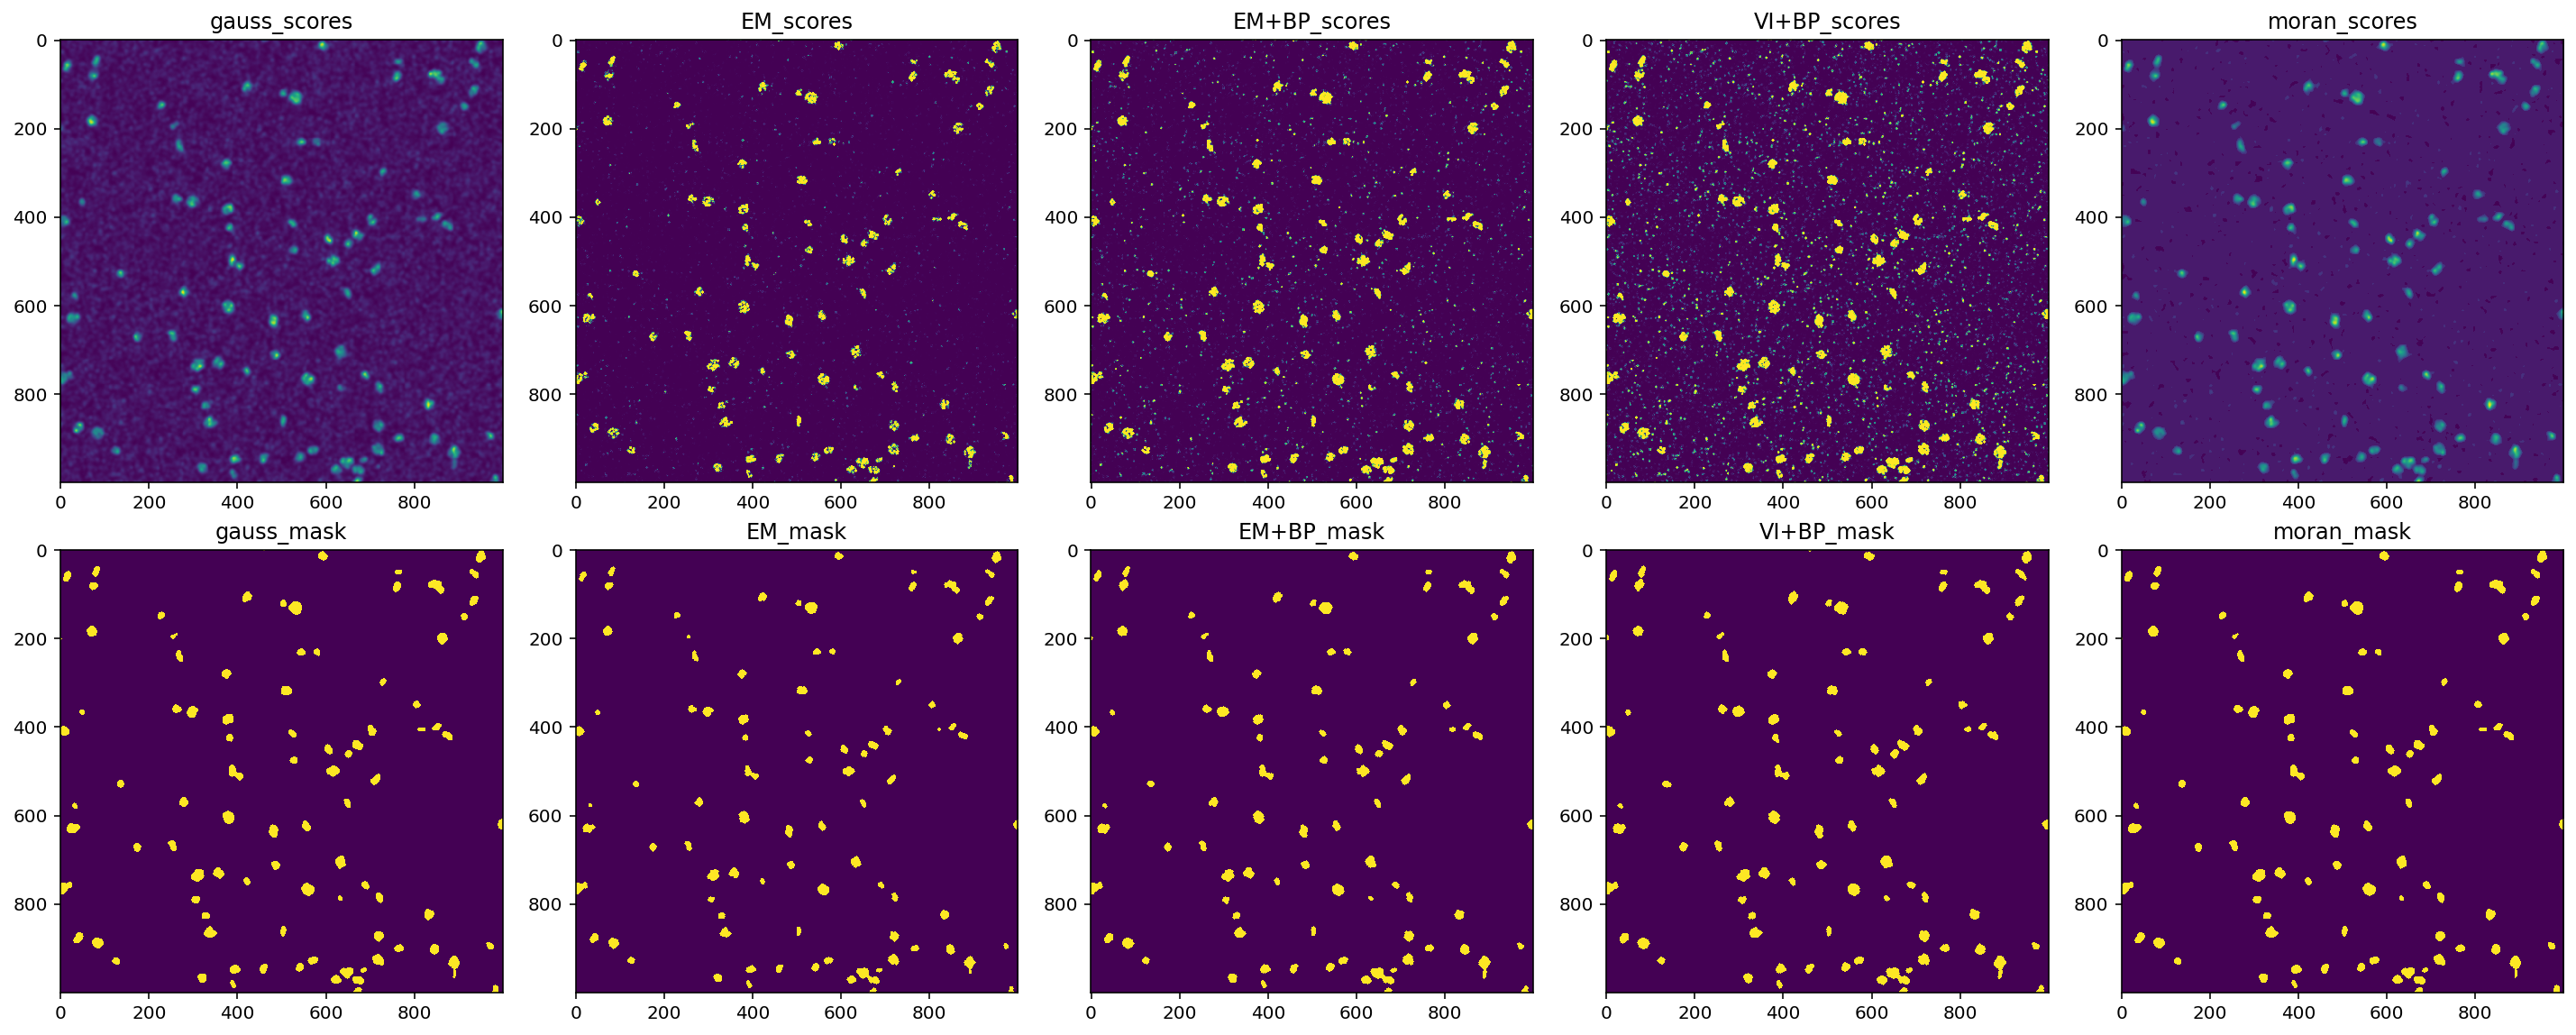

In [170]:
methods = ['gauss', 'EM', 'EM+BP', 'VI+BP', 'moran']
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(4*5, 4*2), tight_layout=True)
for i, method in enumerate(methods):
    st.pl.imshow(adata, f'{method}_scores', ax=axes[:,i][0])
    st.pl.imshow(adata, f'{method}_mask', ax=axes[:,i][1])

## Calculate performance

Naively label each connected component. In other words, each connected set of pixels are labeled as a single label.

In [171]:
# Naively label each connected component as a unique lable.
compare_dfs = []
for method in methods:
    st.pp.segmentation.label_connected_components(adata, method, area_threshold=np.inf)
    compare_dfs.append(st.pp.segmentation.compare(adata, 'labels', f'{method}_labels', random_background=False))
performance_df = pd.concat(compare_dfs, axis=1)
performance_df

|-----> <select> gauss_mask layer in AnnData Object
|-----> <insert> gauss_labels to layers in AnnData Object.
|-----> <select> labels layer in AnnData Object
|-----> <select> gauss_labels layer in AnnData Object
|-----> <select> X layer in AnnData Object
|-----> Computing statistics.
|-----> <select> EM_mask layer in AnnData Object
|-----> <insert> EM_labels to layers in AnnData Object.
|-----> <select> labels layer in AnnData Object
|-----> <select> EM_labels layer in AnnData Object
|-----> <select> X layer in AnnData Object
|-----> Computing statistics.
|-----> <select> EM+BP_mask layer in AnnData Object
|-----> <insert> EM+BP_labels to layers in AnnData Object.
|-----> <select> labels layer in AnnData Object
|-----> <select> EM+BP_labels layer in AnnData Object
|-----> <select> X layer in AnnData Object
|-----> Computing statistics.
|-----> <select> VI+BP_mask layer in AnnData Object
|-----> <insert> VI+BP_labels to layers in AnnData Object.
|-----> <select> labels layer in AnnData

,gauss_labels,EM_labels,EM+BP_labels,VI+BP_labels,moran_labels
True negative,0.993609,0.997489,0.995161,0.992696,0.993677
False positive,0.006391,0.002511,0.004839,0.007304,0.006323
False negative,0.057917,0.141285,0.063007,0.031916,0.065484
True positive,0.942083,0.858715,0.936993,0.968084,0.934516
Precision,0.960718,0.982683,0.969813,0.956504,0.960820
Accuracy,0.986276,0.977740,0.986883,0.989193,0.985258
F1 score,0.951309,0.916526,0.953121,0.962259,0.947486
Adjusted rand score,0.970260,0.952253,0.949628,0.951420,0.970636
Homogeneity,0.988716,0.984059,0.983492,0.983845,0.988777
Completeness,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
ap_df = performance_df.filter(regex='Average precision', axis=0)
ap_df['tau'] = ap_df.index.str.split(' ').str[-1].str.strip('()').astype(float)
ap_df.reset_index(drop=True, inplace=True)
ap_df

,gauss_labels,EM_labels,EM+BP_labels,VI+BP_labels,moran_labels,tau
0,0.883495,0.826923,0.882353,0.892157,0.892157,0.50
1,0.883495,0.792453,0.882353,0.892157,0.892157,0.55
2,0.830189,0.775701,0.846154,0.838095,0.838095,0.60
3,0.830189,0.711712,0.811321,0.838095,0.803738,0.65
4,0.813084,0.681416,0.777778,0.803738,0.787037,0.70
5,0.747748,0.652174,0.729730,0.754545,0.754545,0.75
6,0.686957,0.544715,0.684211,0.707965,0.707965,0.80
7,0.658120,0.338028,0.669565,0.678261,0.608333,0.85
8,0.356643,0.117647,0.381295,0.519685,0.312925,0.90
9,0.089888,0.016043,0.072626,0.128655,0.084270,0.95


<AxesSubplot:xlabel='tau', ylabel='average precision'>

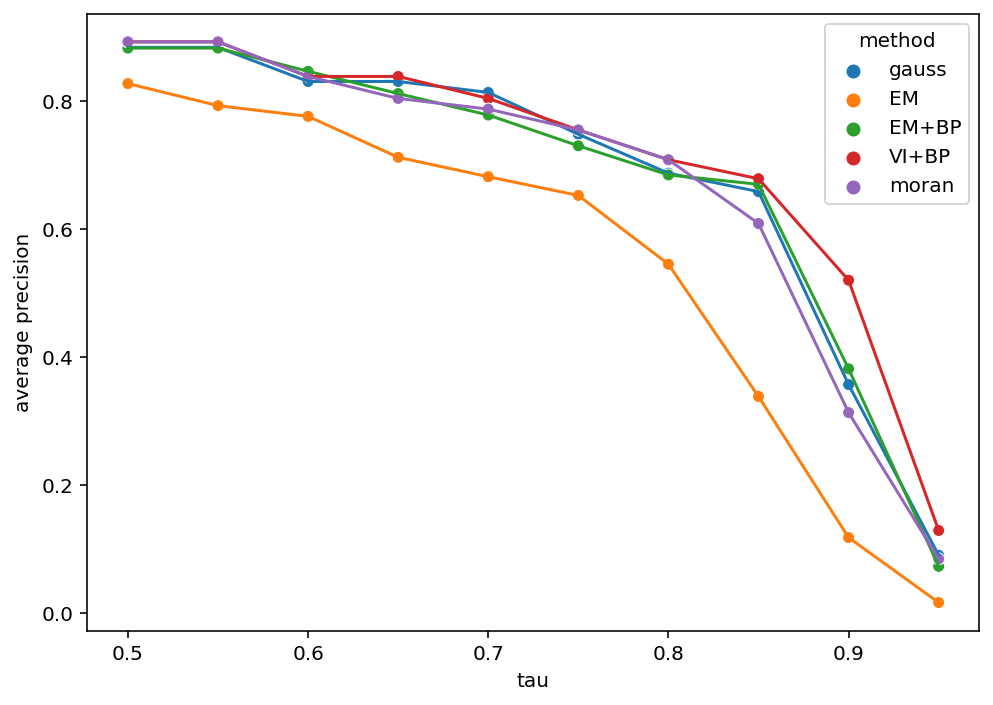

In [174]:
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)
data = pd.melt(ap_df, id_vars='tau', value_name='average precision', var_name='method')
data['method'] = data['method'].str.split('_').str[0]
sns.scatterplot(data=data, x='tau', y='average precision', hue='method', ax=ax)
sns.lineplot(data=data, x='tau', y='average precision', hue='method', ax=ax, legend=False)